In [85]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.optimizer.utils import l_norm
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    reg = 1e-4
    model.add(4, input= 17, kernel_initializer = 1/np.sqrt(17), kernel_regularizer = reg)
    model.add(1, kernel_initializer = 1/np.sqrt(4), kernel_regularizer = reg)

    print("norm_w0: {}".format(l_norm(model.weights)))
    print("sum_w0: {}".format([np.sum(np.square(x)) for x in model.weights]))
    model.set_optimizer(optimizer)
    start = time.time()
    model.fit(X_train,
            Y_train, 
            epochs=1000, 
            verbose=verbose)
    end = time.time()
    return model, (end - start)

def ls_stat(info):
    converged = 0
    tot_iteration = 0
    tot = len(info["ls_conv"])
    for i in range(tot):
        tot_iteration += info["ls_it"][i] + info["zoom_it"][i]
        if info["ls_conv"][i] == "y":
            converged += 1
    
    print("Ls Hit Rate: {}".format(converged/tot))
    print("Ls iteration: {}".format(tot_iteration))

# Monk 2

In [155]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 987#564
ln_maxiter = 100
results = []
eps = 3e-5

Load Monk DataSet


In [159]:
#############################
#        LBFGS m = 3
#############################
m1 = 3
optimizer = LBFGS(m = m1, c1=1e-4, c2=.9, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
lbfgs_1 = model.history 

Build the model
norm_w0: 1.3252378112266983
sum_w0: [1.4079589473024485, 0.34829630900248143]
| alpha: 1.0 | ng: 0.17294522930411713 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0039 - loss_train: 0.27396691400806195 - loss_val: 0
| alpha: 1.0 | ng: 0.13894236520686404 | ls conv: y, it: 0, time: 0.0007 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0039 - loss_train: 0.2399877104568865 - loss_val: 0
| alpha: 1.0 | ng: 0.042406852649382355 | ls conv: y, it: 0, time: 0.0028 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0216 - loss_train: 0.23573190582245035 - loss_val: 0
| alpha: 1.0 | ng: 0.006748511268896048 | ls conv: y, it: 0, time: 0.0005 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0030 - loss_train: 0.23558017863346387 - loss_val: 0
| alpha: 1.0 | ng: 0.004527484835125607 | ls conv: y, it: 0, time: 0.0006 | zoom used: n, conv: -, it: 0|
Epoch: 5 - time: 0.0040 - loss_train: 0.23540681707060526 - loss_val: 0
| alpha: 1.0 | ng: 

In [160]:
#############################
#        LBFGS m = 30
#############################
m2 = 30
optimizer = LBFGS(m = m2, c1=1e-4, c2=.9, ln_maxiter = ln_maxiter, norm_g_eps = eps, l_eps = eps)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
lbfgs_2 = model.history 

Build the model
norm_w0: 1.3252378112266983
sum_w0: [1.4079589473024485, 0.34829630900248143]
| alpha: 1.0 | ng: 0.17294522930411713 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 1 - time: 0.0049 - loss_train: 0.27396691400806195 - loss_val: 0
| alpha: 1.0 | ng: 0.13894236520686404 | ls conv: y, it: 0, time: 0.0004 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0027 - loss_train: 0.2399877104568865 - loss_val: 0
| alpha: 1.0 | ng: 0.042406852649382355 | ls conv: y, it: 0, time: 0.0006 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0039 - loss_train: 0.23573190582245035 - loss_val: 0
| alpha: 1.0 | ng: 0.006748511268896048 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0021 - loss_train: 0.23558017863346387 - loss_val: 0
| alpha: 1.0 | ng: 0.004527484835125607 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 5 - time: 0.0026 - loss_train: 0.23540693488373401 - loss_val: 0
| alpha: 1.0 | ng: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


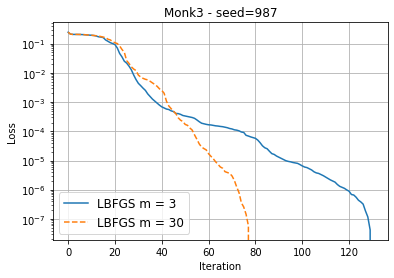

In [158]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(lbfgs_1["loss_mse_reg"] - lbfgs_1["loss_mse_reg"][-1], linestyle='-')
plt.plot(lbfgs_2["loss_mse_reg"] - lbfgs_2["loss_mse_reg"][-1], linestyle = '--')
#plt.plot(np.linspace(0.20, 10**-20), linestyle = '--')
plt.title('Monk3 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['LBFGS m = {}'.format(m1),'LBFGS m = {}'.format(m2)], loc='lower left', fontsize='large')
plt.savefig('./plot/monk2_lbfgs.eps', format='eps')
plt.show()


# Monk 2

In [181]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("2", "train")

seed = 367
ln_maxiter = 100
results = []

Load Monk DataSet


In [182]:
#############################
#        LBFGS m = 3
#############################
m1 = 3
optimizer = LBFGS(m = m1, c1=1e-4, c2=.7, ln_maxiter = ln_maxiter, norm_g_eps = 1e-12, l_eps = 1e-6)


model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
lbfgs_1 = model.history 

Build the model
norm_w0: 1.3674017180709095
sum_w0: [1.4653021117115976, 0.40448534687167725]
| alpha: 0.09089182234271993 | ng: 6.90503622215115 | ls conv: y, it: 0, time: 0.0051 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0085 - loss_train: 0.24134085643202938 - loss_val: 0
| alpha: 1.0 | ng: 3.6123159553226203 | ls conv: y, it: 0, time: 0.0005 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0043 - loss_train: 0.23571253102111225 - loss_val: 0
| alpha: 1.0 | ng: 0.8242482706117827 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0024 - loss_train: 0.23536720278157375 - loss_val: 0
| alpha: 8.0 | ng: 0.4438637790308841 | ls conv: y, it: 3, time: 0.0023 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0039 - loss_train: 0.23417106473545732 - loss_val: 0
| alpha: 1.0 | ng: 1.0112777976907417 | ls conv: y, it: 0, time: 0.0008 | zoom used: n, conv: -, it: 0|
Epoch: 5 - time: 0.0056 - loss_train: 0.2296109154721375 - loss_val: 0
| alpha: 0.50

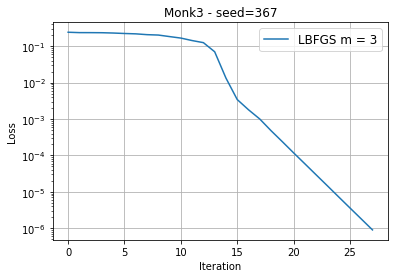

In [183]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(lbfgs_1["loss_mse"], linestyle='-')
#plt.plot(lbfgs_2["loss_mse"], linestyle = '--')
plt.title('Monk3 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['LBFGS m = {}'.format(m1),'LBFGS m = {}'.format(m2)], loc='upper right', fontsize='large')
#plt.savefig('./plot/monk3_lbfgs.eps', format='eps')
plt.show()

# Monk 1

In [171]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")

seed = 632
ln_maxiter = 100
results = []

Load Monk DataSet


In [172]:
#############################
#        LBFGS m = 3
#############################
m1 = 3
optimizer = LBFGS(m = m1, c1=1e-4, c2=.8, ln_maxiter = ln_maxiter, norm_g_eps = 1e-10, l_eps = 1e-10)

model, t = get_fitted_model(X_train, Y_train, optimizer, seed, 2)
print("Time: {}".format(t))
print("Ls Time: {}".format(np.sum(optimizer.history["ls_time"])))
ls_stat(optimizer.history)
lbfgs_1 = model.history 

Build the model
norm_w0: 1.3077950924662833
sum_w0: [1.3445785108751722, 0.36574949300372217]
| alpha: 0.08533790654152305 | ng: 1.7751332497478032 | ls conv: y, it: 0, time: 0.0012 | zoom used: y, conv: y, it: 2|
Epoch: 1 - time: 0.0062 - loss_train: 0.2501117841181558 - loss_val: 0
| alpha: 2.0 | ng: 0.9110655069805264 | ls conv: y, it: 1, time: 0.0012 | zoom used: n, conv: -, it: 0|
Epoch: 2 - time: 0.0031 - loss_train: 0.24898392896047508 - loss_val: 0
| alpha: 1.0 | ng: 0.7058609495276407 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 3 - time: 0.0030 - loss_train: 0.24345279698373232 - loss_val: 0
| alpha: 1.0 | ng: 2.03040100548054 | ls conv: y, it: 0, time: 0.0003 | zoom used: n, conv: -, it: 0|
Epoch: 4 - time: 0.0018 - loss_train: 0.2295736351917178 - loss_val: 0
| alpha: 2.0 | ng: 6.164656928738692 | ls conv: y, it: 1, time: 0.0018 | zoom used: n, conv: -, it: 0|
Epoch: 5 - time: 0.0048 - loss_train: 0.20088933232956588 - loss_val: 0
| alpha: 1.0 | 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


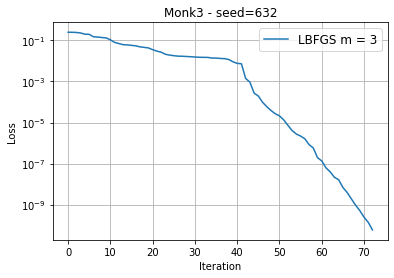

In [173]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(lbfgs_1["loss_mse"], linestyle='-')
#plt.plot(lbfgs_2["loss_mse"], linestyle = '--')
plt.title('Monk3 - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['LBFGS m = {}'.format(m1),'LBFGS m = {}'.format(m2)], loc='upper right', fontsize='large')
plt.savefig('./plot/monk3_lbfgs_2.eps', format='eps')
plt.show()